In [1]:
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras


In [2]:
import os
import zipfile
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
local_zip='/home/hemanth/Downloads/cats_and_dogs_filtered.zip'
zip_ref=zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/home/hemanth/Desktop/')
zip_ref.close()

In [4]:
base_dir='/home/hemanth/Desktop/cats_and_dogs_filtered/'
train_dir=os.path.join(base_dir,'train')
validation_dir=os.path.join(base_dir,'validation')

In [5]:
train_cats_dir=os.path.join(train_dir,'cats')
train_dogs_dir=os.path.join(train_dir,'dogs')
validation_cats_dir=os.path.join(validation_dir,'cats')
validation_dogs_dir=os.path.join(validation_dir,'dogs')


In [6]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    
    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [7]:
model.compile(loss='binary_crossentropy',
             optimizer=RMSprop(lr=0.001),
             metrics=['accuracy'])

In [17]:
train_datagen=ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [18]:
train_datagen=ImageDataGenerator(rescale=1./255)
test_datagen=ImageDataGenerator(rescale=1./255)

In [19]:
train_generator=train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
    
)

Found 2000 images belonging to 2 classes.


In [20]:
validation_generator=test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
    
)

Found 1000 images belonging to 2 classes.


In [22]:
history=model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=5,
    validation_data=validation_generator,
    validation_steps=50,
    verbose=2
)

Epoch 1/5
100/100 - 83s - loss: 0.0535 - accuracy: 0.9850 - val_loss: 2.0974 - val_accuracy: 0.7110
Epoch 2/5
100/100 - 81s - loss: 0.0462 - accuracy: 0.9880 - val_loss: 1.9031 - val_accuracy: 0.7100
Epoch 3/5
100/100 - 79s - loss: 0.0250 - accuracy: 0.9940 - val_loss: 2.3493 - val_accuracy: 0.7150
Epoch 4/5
100/100 - 75s - loss: 0.0546 - accuracy: 0.9810 - val_loss: 2.0491 - val_accuracy: 0.7210
Epoch 5/5
100/100 - 74s - loss: 0.0322 - accuracy: 0.9915 - val_loss: 2.4240 - val_accuracy: 0.7380


Text(0, 0.5, 'Accuracy')

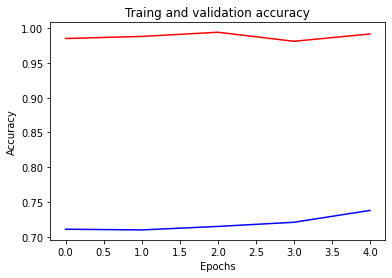

In [27]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))
### accuracy 
plt.plot(epochs,acc,'r',label='Training  Accuracy')
plt.plot(epochs,val_acc,'b',label='validation  Accuracy')
plt.title('Traing and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')


Text(0, 0.5, 'loss')

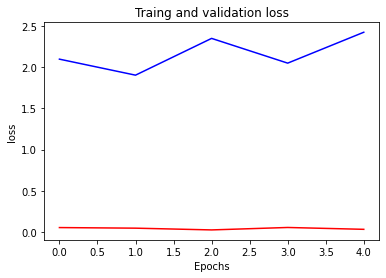

In [25]:

### loss
plt.plot(epochs,loss,'r',label='Training  loss')
plt.plot(epochs,val_loss,'b',label='validation loss')
plt.title('Traing and validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')

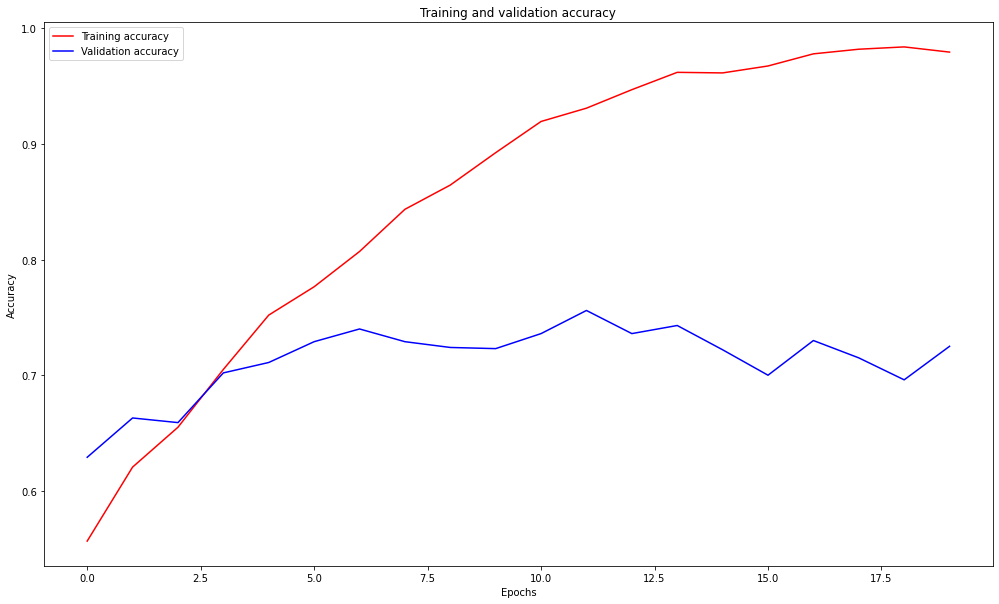

In [12]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(len(acc))
plt.figure(figsize=(17, 10))
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc=0)
plt.show()

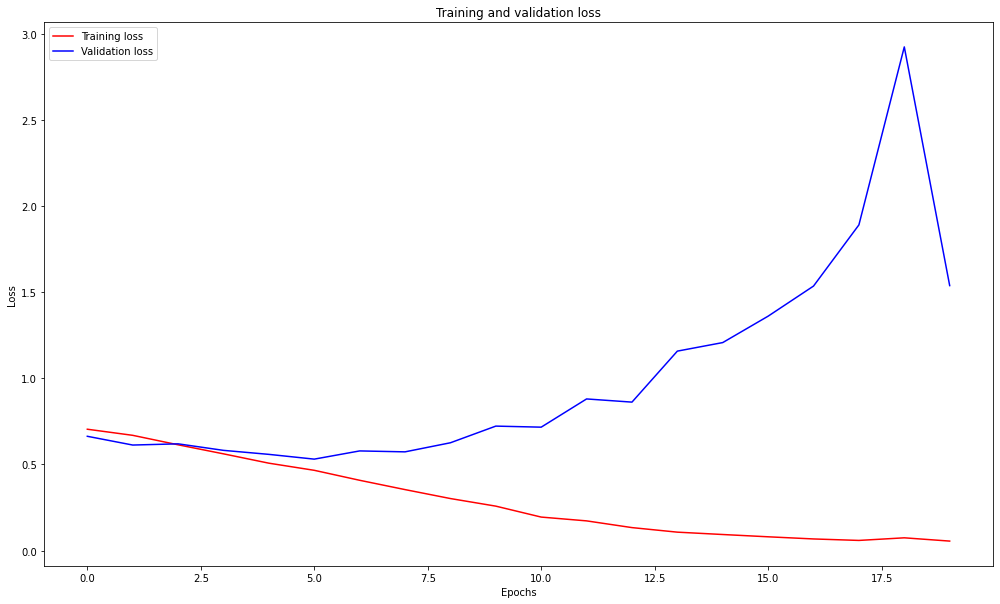

In [14]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))
plt.figure(figsize=(17,10))
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc=0)
plt.show()